In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from zipfile import ZipFile

In [2]:
with ZipFile('../../datasets/population.zip', 'r') as zip_ref:
    zip_ref.extractall(f'data/')
    
with ZipFile('../../datasets/oil-prices.zip', 'r') as zip_ref:
    zip_ref.extractall(f'data/')

In [3]:
population = pd.read_csv('data/population-master/data/population.csv')
wti_year = pd.read_csv('data/oil-prices-master/data/wti-year.csv')
brent_year = pd.read_csv('data/oil-prices-master/data/brent-year.csv')

In [4]:
brent_year.head()

,Date,Price
0,1987-06-30,18.53
1,1988-06-30,14.91
2,1989-06-30,18.23
3,1990-06-30,23.76
4,1991-06-30,20.04


In [5]:
brent_year["Year"] = pd.DatetimeIndex(brent_year["Date"]).year
brent_year.head()

,Date,Price,Year
0,1987-06-30,18.53,1987
1,1988-06-30,14.91,1988
2,1989-06-30,18.23,1989
3,1990-06-30,23.76,1990
4,1991-06-30,20.04,1991


In [6]:
wti_year.head()

,Date,Price
0,1986-06-30,15.05
1,1987-06-30,19.20
2,1988-06-30,15.97
3,1989-06-30,19.64
4,1990-06-30,24.53


In [7]:
wti_year["Year"] = pd.DatetimeIndex(wti_year["Date"]).year
wti_year.head()

,Date,Price,Year
0,1986-06-30,15.05,1986
1,1987-06-30,19.20,1987
2,1988-06-30,15.97,1988
3,1989-06-30,19.64,1989
4,1990-06-30,24.53,1990


In [8]:
population.head()

,Country Name,Country Code,Year,Value
0,Arab World,ARB,1960,92197753
1,Arab World,ARB,1961,94724510
2,Arab World,ARB,1962,97334442
3,Arab World,ARB,1963,100034179
4,Arab World,ARB,1964,102832760


In [9]:
def extract_data_by_country(df, country):
    return df[(df["Country Name"] == country)]

In [10]:
bahrain_population = extract_data_by_country(population,"Bahrain")
ukraine_population = extract_data_by_country(population,"Ukraine")
belarus_population = extract_data_by_country(population,"Belarus")

In [11]:
bahrain_population.describe()

,Year,Value
count,59.000000,5.900000e+01
mean,1989.000000,6.019306e+05
std,17.175564,4.108744e+05
min,1960.000000,1.624270e+05
25%,1974.500000,2.592270e+05
50%,1989.000000,4.810870e+05
75%,2003.500000,8.042760e+05
max,2018.000000,1.569439e+06


In [12]:
ukraine_population.describe()

,Year,Value
count,59.000000,5.900000e+01
mean,1989.000000,4.809005e+07
std,17.175564,2.647214e+06
min,1960.000000,4.266465e+07
25%,1974.500000,4.578840e+07
50%,1989.000000,4.812584e+07
75%,2003.500000,5.047400e+07
max,2018.000000,5.217921e+07


In [13]:
belarus_population.describe()

,Year,Value
count,59.000000,5.900000e+01
mean,1989.000000,9.532857e+06
std,17.175564,5.431571e+05
min,1960.000000,8.198000e+06
25%,1974.500000,9.342292e+06
50%,1989.000000,9.527985e+06
75%,2003.500000,9.977305e+06
max,2018.000000,1.023900e+07


<AxesSubplot:xlabel='Year'>

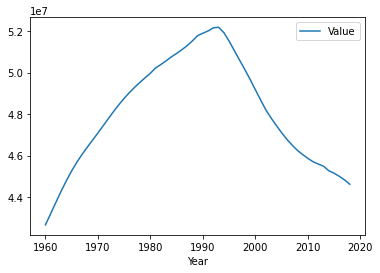

In [14]:
ukraine_population.plot(y='Value', x = 'Year')

<AxesSubplot:xlabel='Year'>

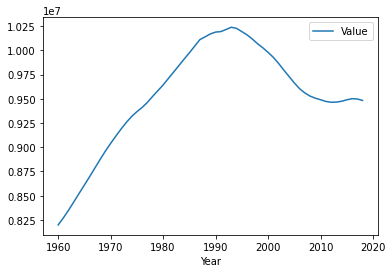

In [15]:
belarus_population.plot(y='Value', x = 'Year')

<AxesSubplot:xlabel='Year'>

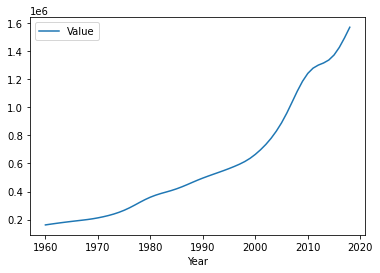

In [16]:
bahrain_population.plot(y='Value', x = 'Year')

Text(0.5, 1.0, 'Population by country per year')

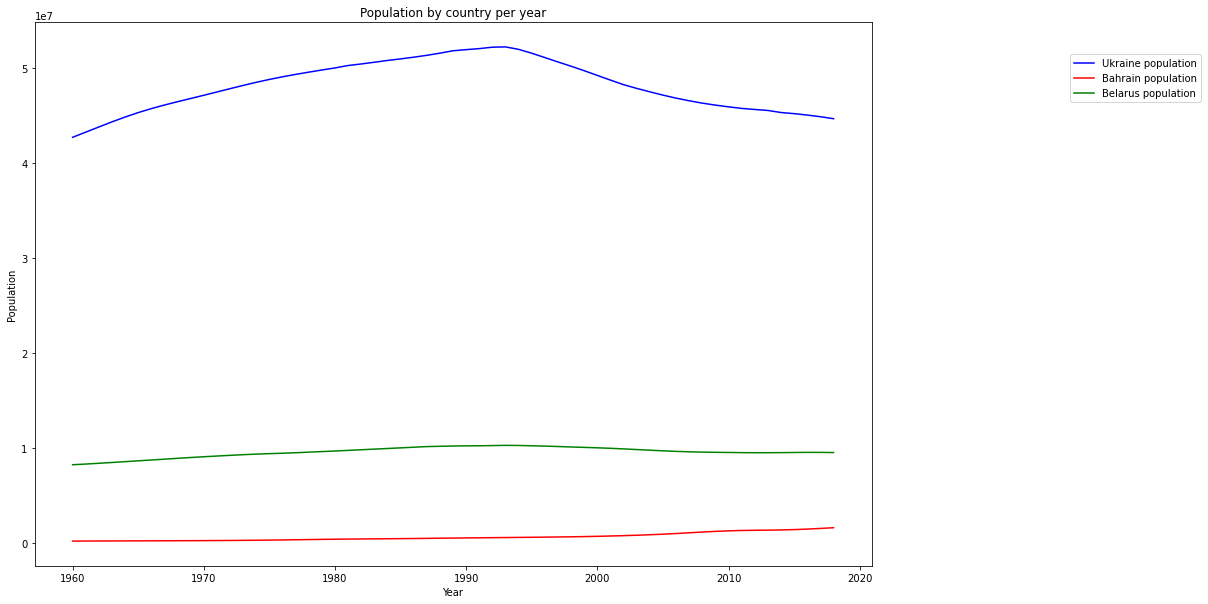

In [17]:
plt.figure(figsize=(15, 10))

plt.plot(ukraine_population['Year'], ukraine_population['Value'], label="Ukraine population", color='blue')
plt.plot(bahrain_population['Year'], bahrain_population['Value'], label="Bahrain population", color='red')
plt.plot(belarus_population['Year'], belarus_population['Value'], label="Belarus population", color='green')

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("Year")
plt.ylabel("Population")
plt.title("Population by country per year")

<AxesSubplot:xlabel='Year'>

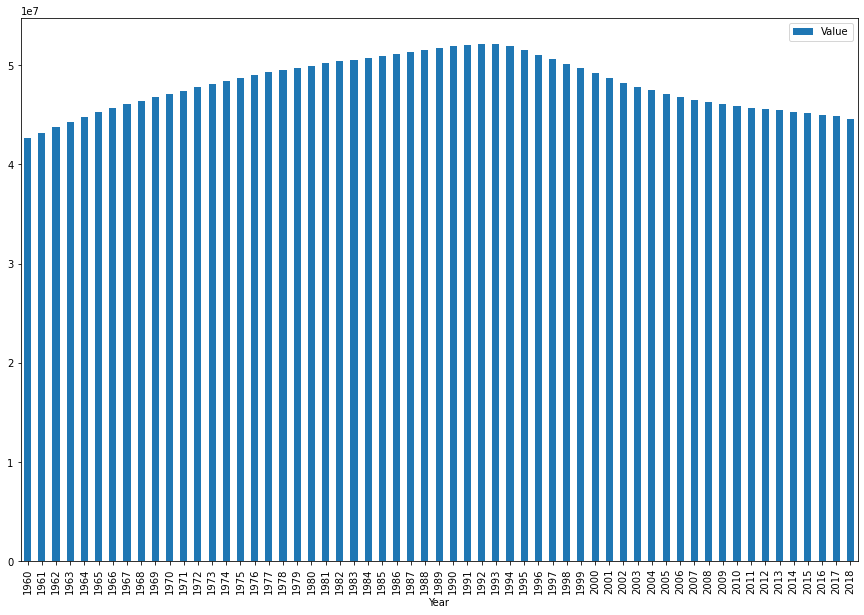

In [18]:
ukraine_population.plot(y='Value', x = 'Year', kind='bar', figsize=(15, 10))

<AxesSubplot:xlabel='Year'>

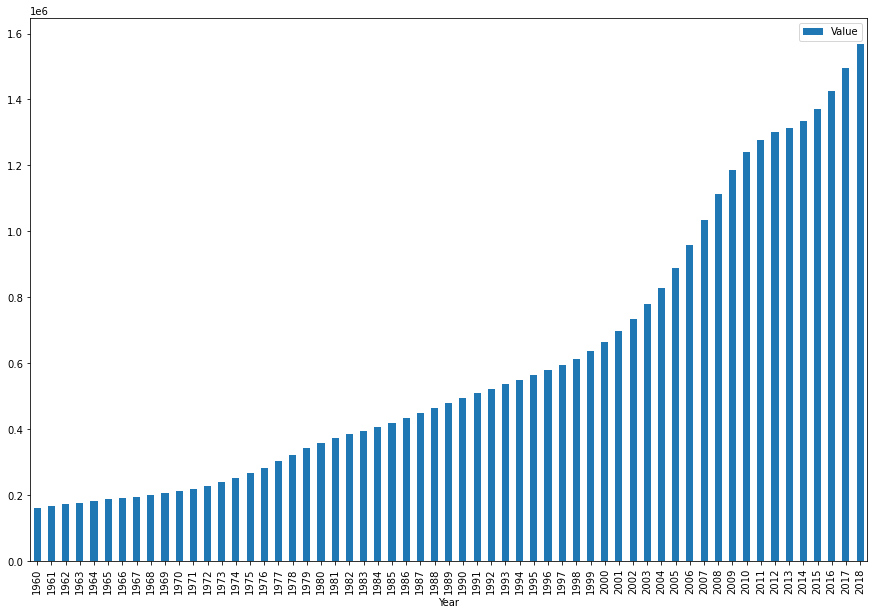

In [19]:
bahrain_population.plot(y='Value', x = 'Year', kind='bar', figsize=(15, 10))

<AxesSubplot:xlabel='Year'>

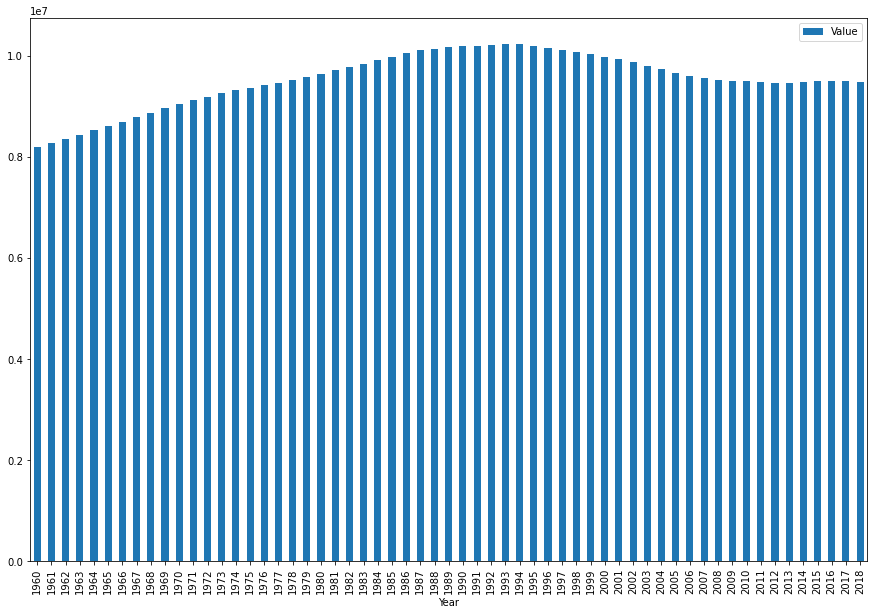

In [20]:
belarus_population.plot(y='Value', x = 'Year', kind='bar', figsize=(15, 10))

In [21]:
population_and_wti = population.merge(wti_year, how= 'inner', on = 'Year') 

In [22]:
population_and_wti

,Country Name,Country Code,Year,Value,Date,Price
0,Arab World,ARB,1986,197338142,1986-06-30,15.05
1,Caribbean small states,CSS,1986,5855443,1986-06-30,15.05
2,Central Europe and the Baltics,CEB,1986,109846594,1986-06-30,15.05
3,Early-demographic dividend,EAR,1986,1847860252,1986-06-30,15.05
4,East Asia & Pacific,EAS,1986,1710989831,1986-06-30,15.05
...,...,...,...,...,...,...
8644,Virgin Islands (U.S.),VIR,2018,106977,2018-06-30,65.23
8645,West Bank and Gaza,PSE,2018,4569087,2018-06-30,65.23
8646,"Yemen, Rep.",YEM,2018,28498687,2018-06-30,65.23
8647,Zambia,ZMB,2018,17351822,2018-06-30,65.23


Text(0.5, 1.0, 'Population by country and price wti oil per year')

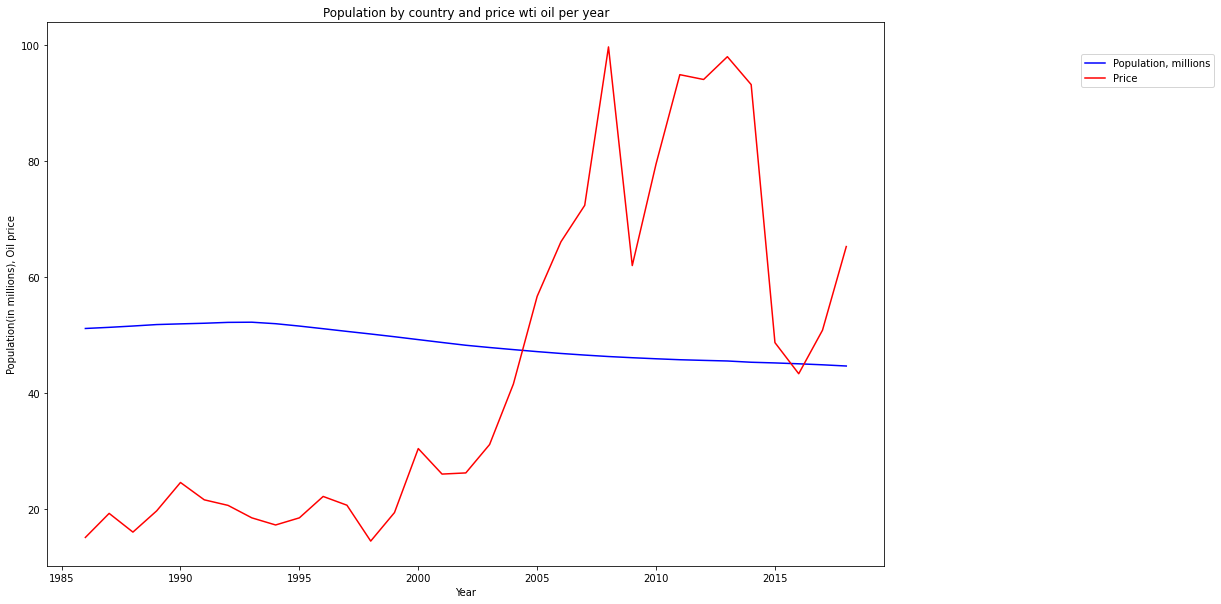

In [23]:
data_for_ukraine = extract_data_by_country(population_and_wti, "Ukraine")
plt.figure(figsize=(15, 10))

plt.plot(data_for_ukraine['Year'], (data_for_ukraine['Value'] / 1000000), label="Population, millions", color='blue')
plt.plot(data_for_ukraine['Year'], (data_for_ukraine['Price']), label="Price", color='red')

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("Year")
plt.ylabel("Population(in millions), Oil price")
plt.title("Population by country and price wti oil per year")

In [24]:
population_and_brent = population.merge(brent_year, how= 'inner', on = 'Year') 

Text(0.5, 1.0, 'Population by country and price wti oil per year')

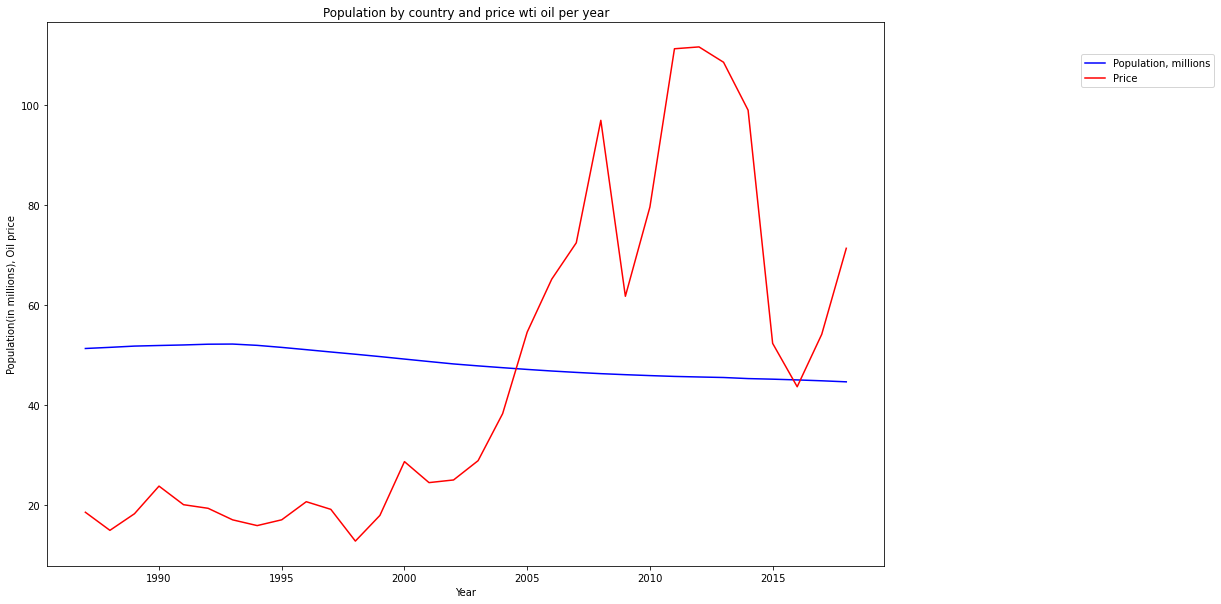

In [25]:
data_for_ukraine = extract_data_by_country(population_and_brent, "Ukraine")
plt.figure(figsize=(15, 10))

plt.plot(data_for_ukraine['Year'], (data_for_ukraine['Value'] / 1000000), label="Population, millions", color='blue')
plt.plot(data_for_ukraine['Year'], (data_for_ukraine['Price']), label="Price", color='red')

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("Year")
plt.ylabel("Population(in millions), Oil price")
plt.title("Population by country and price wti oil per year")